#### 0. 학습 데이터 전처리

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os # 파이썬을 이용해 시스템 정보를 확인하고 제어하는 라이브러리

In [6]:
# 특정 폴더 밑에 사진이름이 규칙적이지 않을 경우에는 os모듈을 이용하자
img = cv2.imread('./dog/2.png')
img.shape

(224, 224, 3)

In [14]:
# 폴더 밑에 있는 파일이나 디렉토리 이름을 얻어내는 함수
dog_file_names = os.listdir('./dog')
dog_file_names

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '144.png',
 '145.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '17.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '175.png',
 '176.png',
 '177.png',
 '178.png',
 '179.png',
 '18.png',
 '1

In [15]:
cat_file_names = os.listdir('./cat')
fox_file_names = os.listdir('./desert_fox')

In [16]:
dog_images = []
for fname in dog_file_names:
    raw_img = cv2.imread('./dog/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    dog_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
dog_images = np.array(dog_images)
dog_images.shape

(371, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


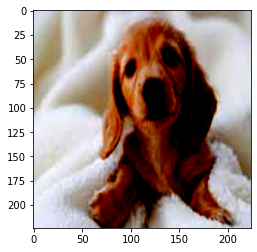

In [17]:
plt.imshow(dog_images[0])
plt.show()

In [19]:
cat_images = []
for fname in cat_file_names:
    raw_img = cv2.imread('./cat/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    cat_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
cat_images = np.array(cat_images)
cat_images.shape

(402, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


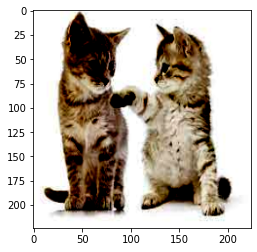

In [20]:
plt.imshow(cat_images[0])
plt.show()

In [22]:
fox_images = []
for fname in fox_file_names:
    raw_img = cv2.imread('./desert_fox/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    fox_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
fox_images = np.array(fox_images)
fox_images.shape

(372, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


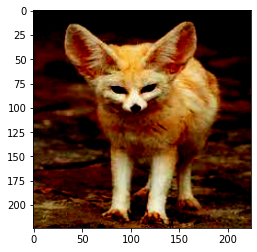

In [23]:
plt.imshow(fox_images[0])
plt.show()

In [24]:
X = np.concatenate([dog_images,cat_images,fox_images])
X.shape

(1145, 224, 224, 3)

In [25]:
# 개 0, 고양이 1, 사막여우 2
y = np.array([0] * 371 + [1] * 402 + [2] * 372)
y.shape

(1145,)

In [26]:
from tensorflow.keras.models import Sequential # 신경망을 붙이는 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층 / 중간및출력층

#### 1. 모델 생성

In [27]:
animal_model = Sequential() # 뼈대 생성
animal_model.add(InputLayer(input_shape=(224*224*3,))) #입력층
animal_model.add(Dense(units=128, activation='sigmoid')) #중간층
animal_model.add(Dense(units=128, activation='sigmoid')) #중간층
animal_model.add(Dense(units=64, activation='sigmoid')) #중간층
animal_model.add(Dense(units=32, activation='sigmoid')) #중간층
animal_model.add(Dense(units=3, activation='softmax')) #출력층

#### 2. 모델 학습

In [28]:
animal_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=425)

In [31]:
X_train.shape

(916, 224, 224, 3)

In [32]:
animal_model.fit(X_train.reshape(916,224*224*3),
                y_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 3s 104ms/step - loss: 1.1472 - accuracy: 0.3352
Epoch 2/100
29/29 [==============================] - 3s 105ms/step - loss: 1.0929 - accuracy: 0.3526
Epoch 3/100
29/29 [==============================] - 3s 101ms/step - loss: 1.0873 - accuracy: 0.3821
Epoch 4/100
29/29 [==============================] - 3s 103ms/step - loss: 1.0817 - accuracy: 0.4127
Epoch 5/100
29/29 [==============================] - 3s 102ms/step - loss: 1.0782 - accuracy: 0.3908
Epoch 6/100
29/29 [==============================] - 3s 106ms/step - loss: 1.0711 - accuracy: 0.4127
Epoch 7/100
29/29 [==============================] - 3s 104ms/step - loss: 1.0609 - accuracy: 0.4334
Epoch 8/100
29/29 [==============================] - 3s 101ms/step - loss: 1.0535 - accuracy: 0.4476
Epoch 9/100
29/29 [==============================] - 3s 101ms/step - loss: 1.0569 - accuracy: 0.4236
Epoch 10/100
29/29 [==============================] - 3s 102ms/step - loss: 1.0444 - accura

Epoch 82/100
29/29 [==============================] - 3s 93ms/step - loss: 0.7302 - accuracy: 0.6496
Epoch 83/100
29/29 [==============================] - 3s 92ms/step - loss: 0.7320 - accuracy: 0.6463
Epoch 84/100
29/29 [==============================] - 3s 92ms/step - loss: 0.7033 - accuracy: 0.6681
Epoch 85/100
29/29 [==============================] - 3s 92ms/step - loss: 0.7120 - accuracy: 0.6496
Epoch 86/100
29/29 [==============================] - 3s 90ms/step - loss: 0.7134 - accuracy: 0.6550
Epoch 87/100
29/29 [==============================] - 3s 90ms/step - loss: 0.7020 - accuracy: 0.6605
Epoch 88/100
29/29 [==============================] - 3s 89ms/step - loss: 0.6915 - accuracy: 0.6736
Epoch 89/100
29/29 [==============================] - 3s 89ms/step - loss: 0.6918 - accuracy: 0.6561
Epoch 90/100
29/29 [==============================] - 3s 93ms/step - loss: 0.7002 - accuracy: 0.6583
Epoch 91/100
29/29 [==============================] - 3s 92ms/step - loss: 0.7073 - accurac

#### 3. 모델 예측

In [34]:
X_test.shape

(229, 224, 224, 3)

In [35]:
pre = animal_model.predict(X_test.reshape(229,224*224*3))

In [36]:
pre

array([[0.25511542, 0.697411  , 0.04747366],
       [0.31962183, 0.6399616 , 0.04041651],
       [0.3883356 , 0.4910251 , 0.12063936],
       [0.01291036, 0.31584832, 0.67124134],
       [0.7449    , 0.04898718, 0.20611282],
       [0.6378465 , 0.04939568, 0.31275782],
       [0.45516637, 0.25678927, 0.28804436],
       [0.00985466, 0.03456243, 0.955583  ],
       [0.3781232 , 0.20733239, 0.4145444 ],
       [0.4406684 , 0.23550867, 0.32382298],
       [0.3553819 , 0.3047497 , 0.33986837],
       [0.5321673 , 0.35878834, 0.10904429],
       [0.3781232 , 0.20733239, 0.4145444 ],
       [0.0207811 , 0.7166564 , 0.2625625 ],
       [0.94387937, 0.02707028, 0.02905028],
       [0.6614464 , 0.30642325, 0.03213034],
       [0.0544842 , 0.8589776 , 0.08653822],
       [0.01217148, 0.07971627, 0.9081123 ],
       [0.74882406, 0.16199121, 0.08918478],
       [0.17819661, 0.47543013, 0.34637326],
       [0.04362449, 0.9126623 , 0.04371318],
       [0.3781232 , 0.20733239, 0.4145444 ],
       [0.

#### 4. 모델 평가

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,pre.argmax(1)))

              precision    recall  f1-score   support

           0       0.42      0.36      0.38        70
           1       0.49      0.43      0.45        82
           2       0.36      0.45      0.40        77

    accuracy                           0.41       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.42      0.41      0.42       229

